# The Smith Chart

Los notebooks de Jupyter permiten combinar, de forma eficiente, texto, gráficas y código ejecutable. 

## Figura 1

En el ejemplo de la figura 1, se considera una impedancia de carga $Z_L=37.5+\jmath 37.5$ $\Omega$, conectada a una línea con impedancia característica $Z_0=75$ $\Omega$.

En esta línea se importa el paquete

In [1]:
from lines import *  # Import the package

Se definen las variables con los datos del problema. La sintaxis es similar a otros lenguajes. La parte imaginaria de un número se obtiene añadiendo la letra `j` al final del número.

In [2]:
zl=37.5+1.j*37.5  # Load impedance 
z0=75  # Characteristic impedance
zpla=0.1  # Distance to evaluate 

A continuación:
* Se normaliza la impedancia
* Se calcula con la función Gr el coeficiente de reflexión. Sus argumentos son la impedancia de carga y la impedancia característica de la línea.
* Se calcula el módulo y la fase y sus valores se guardan en sendas variables porque se van a usar con frecuencia.
* Se calcula la razón de onda estacionaria.

In [3]:
zln=zl/z0  # Normalization 
ga=Gr(zl,z0)  # Usin Gr function
gaph=np.angle(ga)  # Reflection coeficient phase
gamo=abs(ga)  # Reflection coeficient module
swr=(1+gamo)/(1-gamo)  # SWR

La figura 1 se genera con el siguiente código. Se muestra en conjunto, por motivos de espacio, aunque en clase es mejor ir ejecutandolo paso por paso e ir visualizando la figura de forma secuencial.

En el siguiente código se mezcan funciones propias del paquete presentado en este trabajo junto con sentencias específicas de Python. Estas sentencias se pueden utilizar haciendo corta y pega o bien se puede aprender su uso a través de los notebooks desarrollados por los autores y disponibles en el repositorio. 
El manual de uso de las funciones del paquete lines.py está disponible también en el repositorio. Recogemos algunas de las más usadas:

* init(): dibuja la carta de Smith en forma esquemática
* line(px1,py1,px2,py2): dibuja una línea desde el punto con coordenadas cartesianas (px1, py1) hasta el punto (px2,py2).
* arc(r, thi,thf): dibuja un arco de radio r desde al ángulo thi hasta thf. 
* circle(r): dibuja un círculo de radio r.
* point(x,y): dibuja un punto con coordenadas cartesianas x,y.
* cirr(r): dibuja el círculo correspondiente a la resistencia normalizada `r`
* cirx(x): dibuja el círculo correspondiente a la reactancia normalizada `x`

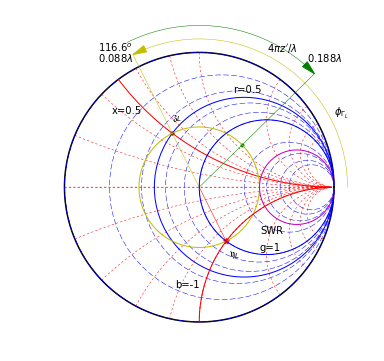

In [5]:
fig=plt.figure()
fig.set_size_inches(6,6)
init()
point(ga.real,ga.imag,c='k')
cirr(zln.real,c='b')
cirx(zln.imag,c='r')
circle(np.abs(ga),c='y')
line(0,0,*P2c(1.1,np.angle(ga)),c='y',lw=0.5)
arc(1.1,0,np.angle(ga),c='y',lw=0.5)
line(0,0,*P2c(1.2,np.angle(ga)-4*pi*0.1),c='g',lw=0.5)
arc(1.2,np.angle(ga),np.angle(ga)-4*pi*0.1,c='g',lw=0.5)
point(*P2c(np.abs(ga),np.angle(ga)-4*pi*0.1),c='g')
point(*P2c(np.abs(ga),np.angle(-ga)),c='r',marker='*')
line(0,0,*P2c(np.abs(ga),np.angle(-ga)),c='r',lw=0.5)
cirr(swr,c='m')
cirr((1/zln).real,c='b')
cirx((1/zln).imag,c='r')
plt.text(-0.20,0.5,r"$\mathfrak{z}_L$")
plt.text(0.22,-0.52,r"$\mathfrak{y}_L$")
plt.text(0.45,-0.35,"SWR")
plt.text(-0.75,0.93,r'0.088$\lambda$')
plt.text(0.8,0.93,r"0.188$\lambda $")
plt.text(0.5,1,r"$4 \pi z'/\lambda $")
plt.text(1.0,0.53,r'$\phi_{\Gamma_L}$')
plt.text(0.25,0.7,'r=0.5')
plt.text(-0.65,0.54,'x=0.5')
plt.text(0.45,-0.47,'g=1')
plt.text(-0.18,-0.75,'b=-1')
plt.text(-0.75,1.0,"116.6$^o$")
plt.savefig('Fig_1.eps')
plt.show()

## Figura 3

En esta figura se hace un repaso a las simetrías presentes en la carta de Smith. El código usa principalmente las funciones `cirr` y `cirx` que dibujan en el esquema de la carta, generada por la función `init`, los círculos correspondientes a resistencia y reactancia normalizadas. 

In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [7]:
from lines import *

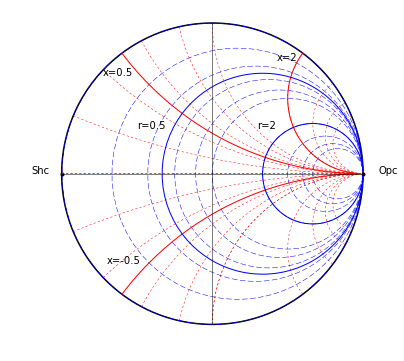

In [9]:
fig=plt.figure()
fig.set_size_inches(6,6)
init()
cirx(0.5,c='r')
cirx(-0.5,c='r')
cirx(2,c='r')
cirr(2,c='b')
cirr(0.5,c='b')
plt.text(-0.73,0.65,'x=0.5')
plt.text(-0.7,-0.6,'x=-0.5')
plt.text(0.43,0.75,'x=2')
plt.text(0.3,0.3,'r=2')
plt.text(-0.5,0.3,'r=0.5')
line(-1,0,1,0,lw=0.5)
line(0,-1,0,1,lw=0.5)
point(-1,0,c='k')
point(1,0,c='k')
plt.text(-1.2,0,'Shc')
plt.text(1.1,0,'Opc')
plt.savefig('Fig_3.eps')
plt.show()